# CSME2 Bonus Point Assignment 1

<div style="text-align: right;font-size: 0.8em">Document Version 1.0.2, released 04/12/2021</div>
For detailed task instructions, please refer to the assignment PDF.

DO NOT CLEAR THE OUTPUT of the notebook you are submitting!

In [1]:
# Add any additional import you need in this cell
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
import itertools
from scipy.io import loadmat
from sklearn.cluster import kmeans_plusplus, KMeans

np.random.seed(1234)

### Setup
__Task A.1__ Load the data into the following numpy arrays. For the output, only use the first torque variable.
Randomly split the data from the file ```sarcos_inv.mat``` into a training set (80%) and a validation set (20%).

In [2]:
# Input and output training data
sarcos_mat = loadmat('sarcos_inv.mat')
sarcos = sarcos_mat['sarcos_inv']

#shuffle dataset before splitting
np.random.shuffle(sarcos)
n = sarcos.shape[0] #number of rows
xs_train = sarcos[:int(0.8*n),0:21]
ys_train = sarcos[:int(0.8*n),21:22]

# Input and output validation data
xs_valid = sarcos[int(0.8*n):,0:21]
ys_valid = sarcos[int(0.8*n):,21:22]

# Input and output test data
sarcos_test_mat = loadmat('sarcos_inv_test.mat')
sarcos_test = sarcos_test_mat['sarcos_inv_test']
xs_test = sarcos_test[:,0:21]
ys_test = sarcos_test[:,21:22]

In [3]:
# Check for yourself 
# The following should lead (roughly) to output 
# (35587, 21)
# (35587, 1)
# (8897, 21)
# (8897, 1)
# (4449, 21)
# (4449, 1)

print(xs_train.shape)
print(ys_train.shape)
print(xs_valid.shape)
print(ys_valid.shape)
print(xs_test.shape)
print(ys_test.shape)

(35587, 21)
(35587, 1)
(8897, 21)
(8897, 1)
(4449, 21)
(4449, 1)


__Task A.2__ Standardize the data such that
1. Training inputs have mean 0
2. Each training input variable has variance 1
3. The training outputs have mean 0
4. Apply the same transformation to the validation and test data

Implement this manually, i.e., do not use a ready scaler like the one provided by scikit-learn.

In [4]:
# Store the standardized data in the following variables
xs_train_std = (xs_train - np.mean(xs_train, axis=0)) / np.std(xs_train, axis=0)
ys_train_std = (ys_train - np.mean(ys_train, axis=0)) / np.std(ys_train, axis=0)

xs_valid_std = (xs_valid - np.mean(xs_valid, axis=0)) / np.std(xs_valid, axis=0)
ys_valid_std = (ys_valid - np.mean(ys_valid, axis=0)) / np.std(ys_valid, axis=0)

xs_test_std = (xs_test - np.mean(xs_test, axis=0)) / np.std(xs_test, axis=0)
ys_test_std = (ys_test - np.mean(ys_test, axis=0)) / np.std(ys_test, axis=0)

In [5]:
# Check for yourself
# The following should lead to (roughly) six zeros and three arrays with (approximately) ones
print(np.mean(xs_train_std))
print(np.mean(ys_train_std))
print(np.mean(xs_valid_std))
print(np.mean(ys_valid_std))
print(np.mean(xs_test_std))
print(np.mean(ys_test_std))

print(np.var(xs_train_std, axis=0))
print(np.var(xs_valid_std, axis=0))
print(np.var(xs_test_std, axis=0))

1.7988736604700613e-17
5.450815378157961e-17
2.1639119481018053e-17
-9.583581914264586e-17
-2.7264507890483246e-17
-2.5553346307398523e-17
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


__Task A.3__

In [6]:
# Task A.3.a
# Implement a function estimating the variance
def my_variance(xs):
    """Calculate the empirical variance of a given vector of scalars
    
    Arguments
    xs      1d numpy array
    
    Returns
    The empirical variance of the provided vector
    """
    # Your implementation
    N = xs.shape[0]
    var = 0
    for i in xs:
        var = var + (i - np.mean(xs))**2/(N-1)
    return var

In [7]:
# Task A.3.b
# Calculate the variance of ys_train_std using your function my_variance
var_ys_train = my_variance(ys_train_std)
print(var_ys_train)

[1.0000281]


In [8]:
# Task A.3.c
# Implement a function calculating the SMSE between two 1d numpy arrays given a normalizing factor
def my_smse(z1, z2, s):
    """Calculate the Standardized Mean Squared Error (SMSE)
    
    Arguments
    z1      1d numpy array (usually the predictions)
    z2      1d numpy array 
    s       Normalization factor 
    
    Returns
    The SMSE of the provided data
    """
    # Your implementation
    N =len(z1)
    SMSE = 0
    for i in range(0,N):
        SMSE = SMSE + (z1[i]-z2[i])**2
    SMSE = SMSE/(N*s)
    return(SMSE)

## Linear regression
### Simple linear regression
__Task A.4__

In [9]:
# This variable should contain the weights corresponding to simple linear regression (LS criterion, no bias term)
Phi = xs_train_std
w_lr = la.solve(Phi.T @ Phi, Phi.T @ ys_train_std)
# This variable should contain the predictions using w_lr on the validation data
ys_pred_valid = xs_valid_std @ w_lr
# This should contain the resulting smse
smse_lr = my_smse(ys_pred_valid, ys_valid_std, var_ys_train)
print(smse_lr)

[0.07107779]


### Linear regression with polynomial features
__Task A.5__

In [10]:
def my_poly_features(X, degree):

    # Your implementation
    N = X.shape[0]
    D = X.shape[1]
    poly = np.ones((N,1))
    d_array = list(range(D))
    indices = []
    
    for i in range(1,degree+1):
        comb = list(itertools.combinations_with_replacement(d_array, i))
        indices.append(comb)
    indices =  [item for sublist in indices for item in sublist]
    for i in indices:
        poly_j = np.ones((N,1))
        for j in i:
            xs_current = X[:,j].reshape(N,1)
            poly_j = xs_current*poly_j
        poly = np.hstack((poly,poly_j))
    return poly
#my_poly_features(np.array([[1,2,3],[4,5,6]]), 2)

In [11]:

# Tasks A.5.b
# This variable should contain the weights corresponding to linear regression using polynomial features up to degree 2 and 3
Phi2 = my_poly_features(xs_train_std,2)
w_poly2 = la.solve(Phi2.T @ Phi2, Phi2.T @ ys_train_std)
ys_pred_poly2_valid = my_poly_features(xs_valid_std,2) @ w_poly2
smse_poly2 = my_smse(ys_pred_poly2_valid, ys_valid_std, var_ys_train)
print("smse_poly2 : ",smse_poly2)

# This variable should contain the predictions using w_poly2 and w_poly3 on the validation data
Phi3 = my_poly_features(xs_train_std,3)
w_poly3 = la.solve(Phi3.T @ Phi3, Phi3.T @ ys_train_std)
ys_pred_poly3_valid = my_poly_features(xs_valid_std,3) @ w_poly3
smse_poly3 = my_smse(ys_pred_poly3_valid, ys_valid_std, var_ys_train)
print("smse_poly3 : ",smse_poly3)



smse_poly2 :  [0.03276695]
smse_poly3 :  [0.01600717]


## Clustering
__Task B.1__ Implement the basic $K$-Means algorithm.

In [12]:
def my_kmeans(xs, init_centers, n_iter):
    """Runs the K-Means algorithm from a given initialization
    
    Arguments
    xs            2d numpy array of shape (N,D) containing N samples of dimension D
    init_centers  2d numpy array of shape (K,D) containing the initial cluster centers
    n_iter        Number of iterations of the K-Means algorithm
    
    Returns
    An (K,D) numpy array containing the final cluster centers
    """
    # Your implementation
    def distance(a,b):     
        return np.sqrt(np.sum((a - b)**2))
    
    N = xs.shape[0]
    K = init_centers.shape[0]
    D = init_centers.shape[1]
    distance_arr = np.zeros(K)
    
    #r = 1 if data point X is supposed to belong to cluster k and 0 otherwise.
    r = np.zeros((N,K))
    
    for i in range(0,N):
        for j in range(0,K):
            distance_arr[j] = distance(xs[i],init_centers[j])
        #this xs belongs to cluster with index "k"
        k = np.where(distance_arr==min(distance_arr))[0][0]
        r[i,k] = 1
    #calculate new centroids
    for k in range(0,K):
        cluster_points = np.multiply(xs,r[:,k:k+1])
        cluster_points = cluster_points[~np.all(cluster_points == 0, axis=1)] #remove zero rows
        init_centers[k] = np.mean(cluster_points, axis= 0)
    if n_iter-1 != 0:
        my_kmeans(xs, init_centers, n_iter-1)
    return init_centers
    

__Task B.2__ Generate test data set and plot it.

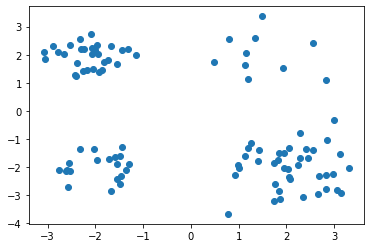

In [13]:
"""
Generate a test data set of 100 points: For each point, independently choose from
four 2d normal distributions having means (−2, 2), (−2,−2), (2,−2), (2, 2) and covariance matrices
0.2I, 0.2I, 0.5I, 0.5I, respectively, with probabilities 0.3, 0.2, 0.4, 0.1. Plot the data set as a scatter
plot.
"""
means = [(-2, 2), (-2,-2), (2,-2), (2, 2)]
I = np.identity(2)
cov = [0.2*I, 0.2*I, 0.5*I, 0.5*I]
#number of points to be drawn from each distribution = probability *(total number of data points)
n = [30 , 20, 40, 10]
# Test data of shape (100,2)
xs_cluster_test = np.random.multivariate_normal(means[0],cov[0],n[0])
for i in range(1,4):
    xs_cluster_test = np.append(xs_cluster_test, np.random.multivariate_normal(means[i],cov[i],n[i]), axis=0)
np.random.shuffle(xs_cluster_test)
plt.scatter(xs_cluster_test[:,0],xs_cluster_test[:,1])
#print(xs_cluster_test.shape)

__Task B.3__ Run your $K$-Means algorithm on the test data for $K=2,3,4,5$ clusters and plot the final cluster centers.

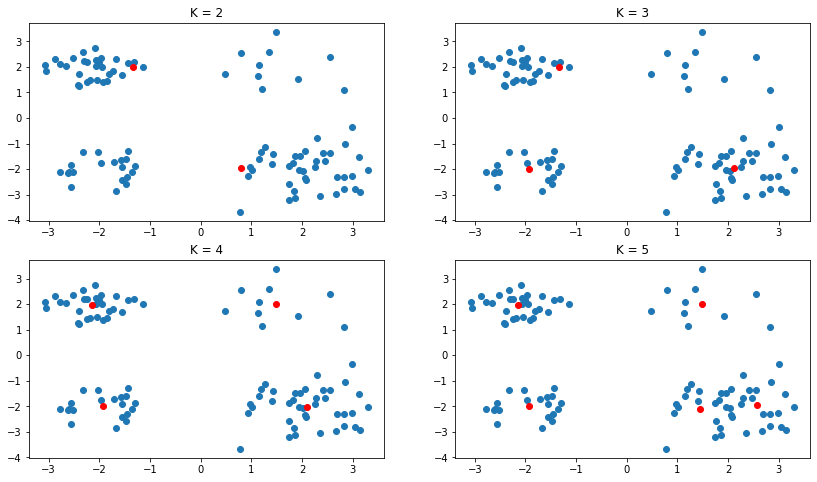

In [14]:
# Use kmeans_plusplus(xs_cluster_test, K, random_state=0) for initialization
"""
Run your K-Means implementation on the test data set for K = 2, 3, 4, 5 clusters using 5
iterations. For each value of K, plot the final cluster centers together with the data set in a scatter
plot.
"""

figure, axis = plt.subplots(2, 2)
figure.set_size_inches(14, 8)
#for K = 2
K = 2
init_centers, indices = kmeans_plusplus(xs_cluster_test, K, random_state=0)
centers = my_kmeans(xs_cluster_test, init_centers, 5)
axis[0, 0].scatter(xs_cluster_test[:,0],xs_cluster_test[:,1])
axis[0, 0].scatter(centers[:,0],centers[:,1],color="r")
axis[0, 0].set_title("K = 2") 
#for K = 3
K = 3
init_centers, indices = kmeans_plusplus(xs_cluster_test, K, random_state=0)
centers = my_kmeans(xs_cluster_test, init_centers, 5)
axis[0, 1].scatter(xs_cluster_test[:,0],xs_cluster_test[:,1])
axis[0, 1].scatter(centers[:,0],centers[:,1],color="r")
axis[0, 1].set_title("K = 3")
 
#for K = 4
K = 4
init_centers, indices = kmeans_plusplus(xs_cluster_test, K, random_state=0)
centers = my_kmeans(xs_cluster_test, init_centers, 5)
axis[1, 0].scatter(xs_cluster_test[:,0],xs_cluster_test[:,1])
axis[1, 0].scatter(centers[:,0],centers[:,1],color="r")
axis[1, 0].set_title("K = 4")  
#for K = 5
K = 5
init_centers, indices = kmeans_plusplus(xs_cluster_test, K, random_state=0)
centers = my_kmeans(xs_cluster_test, init_centers, 5)
axis[1, 1].scatter(xs_cluster_test[:,0],xs_cluster_test[:,1])
axis[1, 1].scatter(centers[:,0],centers[:,1],color="r")
axis[1, 1].set_title("K = 5")  
# Combine all the operations and display
plt.show()


## Radial Basis Function Network
__Task C.1__ Find $K=100$ cluster centers using $K$-Means.

In [15]:
# This 100x21 numpy array should contain the cluster centers
#init_centers, indices = kmeans_plusplus(xs_train_std, 100, random_state=0)
kmeans = KMeans(n_clusters=100).fit(xs_train_std) #by default uses kmeans++
xs_centers = kmeans.cluster_centers_

__Task C.2__ Implement the Gaussian basis functions and transform the data accordingly

In [16]:
def gauss_basis_function(x, means, variances):
    return np.exp(-np.sum(((x[:, np.newaxis]-means)**2), axis=-1) / (2*variances))/np.sqrt(2*np.pi*variances)
xs_train_gauss = gauss_basis_function(xs_train_std, xs_centers, 25*25)

__Task C.3__ Run simple linear regression on the transformed data and evaluate it on the test set

In [17]:
# This should contain the resulting predictions on the validation data set
Phi_G= np.hstack((np.ones(xs_train_gauss.shape[0]).reshape(xs_train_gauss.shape[0],1),xs_train_gauss)) #adding additional ones for bias term
w_gauss = la.solve(Phi_G.T @ Phi_G, Phi_G.T @ ys_train_std)
# This variable should contain the predictions using w_gauss on the validation data
ys_pred_gauss_valid = gauss_basis_function(xs_valid_std, xs_centers, 25*25)@ w_gauss[1:] + w_gauss[0] # w_gauss[0] is the bias term
# This should contain the resulting smse
smse_gauss = my_smse(ys_pred_gauss_valid, ys_valid_std, var_ys_train)
print("smse_gauss :",smse_gauss) 

smse_gauss : [0.04281145]


__Open task__ Can you improve the performance of the RBF network?

### Open task__ Can you improve the performance of the RBF network?

Hyper-parameter tuning : Varying number of cluster centers and standard deviation

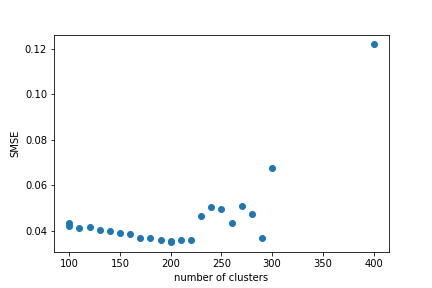

'\n#varying standard deviation \nn=200\nsmse_arr3=[]\nfor std in range(22,27,1):\n    kmeans = KMeans(n_clusters=n).fit(xs_train_std)\n    xs_centers = kmeans.cluster_centers_\n    xs_train_gauss = gauss_basis_function(xs_train_std, xs_centers, std*std)\n    Phi= np.hstack((np.ones(xs_train_gauss.shape[0]).reshape(xs_train_gauss.shape[0],1),xs_train_gauss))\n    w_gauss = la.solve(Phi.T @ Phi, Phi.T @ ys_train_std)\n    ys_pred_gauss_valid = gauss_basis_function(xs_valid_std, xs_centers, 25*25)@ w_gauss[1:] + w_gauss[0]\n    smse_gauss = my_smse(ys_pred_gauss_valid, ys_valid_std, var_ys_train)\n    smse_arr3= np.append(smse_arr3,smse_gauss)\n    print(n , std , smse_gauss)\n'

In [18]:
#below code takes a good amount of time to run hence commented out , the resulting graph was saved and displayed
#findins smse for 100 to 1000 Gaussians Basis functions with steps of 100
"""
smse_arr=[]
for n in range(100,1000,100):
    kmeans = KMeans(n_clusters=n).fit(xs_train_std)
    xs_centers = kmeans.cluster_centers_
    xs_train_gauss = gauss_basis_function(xs_train_std, xs_centers, 25*25)
    Phi= np.hstack((np.ones(xs_train_gauss.shape[0]).reshape(xs_train_gauss.shape[0],1),xs_train_gauss))
    w_gauss = la.solve(Phi.T @ Phi, Phi.T @ ys_train_std)
    ys_pred_gauss_valid = gauss_basis_function(xs_valid_std, xs_centers, 25*25)@ w_gauss[1:] + w_gauss[0]
    smse_gauss = my_smse(ys_pred_gauss_valid, ys_valid_std, var_ys_train)
    smse_arr= np.append(smse_arr,smse_gauss)
    print(smse_gauss) 
"""
#findins smse for 100 to 300 Gaussians Basis functions with steps of 10
"""
smse_arr2=[]
for n in range(100,300,10):
    kmeans = KMeans(n_clusters=n).fit(xs_train_std)
    xs_centers = kmeans.cluster_centers_
    xs_train_gauss = gauss_basis_function(xs_train_std, xs_centers, 25*25)
    Phi= np.hstack((np.ones(xs_train_gauss.shape[0]).reshape(xs_train_gauss.shape[0],1),xs_train_gauss))
    w_gauss = la.solve(Phi.T @ Phi, Phi.T @ ys_train_std)
    ys_pred_gauss_valid = gauss_basis_function(xs_valid_std, xs_centers, 25*25)@ w_gauss[1:] + w_gauss[0]
    smse_gauss = my_smse(ys_pred_gauss_valid, ys_valid_std, var_ys_train)
    smse_arr2= np.append(smse_arr2,smse_gauss)
    print(smse_gauss) 
"""
"""
n = np.arange(100, 1000,100).reshape((9,1))[0:4]
n2 = np.arange(100,300,10).reshape((20,1))
n = np.append(n,n2,axis =0)
#smse_arr = smse_arr.reshape((9,1))
#smse_arr2 = smse_arr2.reshape((20,1))
smse_arr = np.append(smse_arr[0:4],smse_arr2,axis =0)
P = np.append(n,smse_arr,axis =1)
plt.scatter(P[:,0],P[:,1])
plt.xlabel("number of clusters")
plt.ylabel("SMSE")
plt.savefig('clusteropt.png')
"""
from IPython.display import Image
display(Image(filename='clusteropt.png'))
"""
#varying standard deviation 
n=200
smse_arr3=[]
for std in range(22,27,1):
    kmeans = KMeans(n_clusters=n).fit(xs_train_std)
    xs_centers = kmeans.cluster_centers_
    xs_train_gauss = gauss_basis_function(xs_train_std, xs_centers, std*std)
    Phi= np.hstack((np.ones(xs_train_gauss.shape[0]).reshape(xs_train_gauss.shape[0],1),xs_train_gauss))
    w_gauss = la.solve(Phi.T @ Phi, Phi.T @ ys_train_std)
    ys_pred_gauss_valid = gauss_basis_function(xs_valid_std, xs_centers, 25*25)@ w_gauss[1:] + w_gauss[0]
    smse_gauss = my_smse(ys_pred_gauss_valid, ys_valid_std, var_ys_train)
    smse_arr3= np.append(smse_arr3,smse_gauss)
    print(n , std , smse_gauss)
"""
#best results were found for n = 200 clusters and standard deviation = 25 

#### Ridge and Lasso Regularization

In [19]:
from sklearn.linear_model import Ridge,Lasso
xs_valid_gauss = gauss_basis_function(xs_valid_std, xs_centers, 25*25)
model_ridge = Ridge(alpha=0.1, fit_intercept=False)
model_ridge.fit(xs_train_gauss, ys_train_std)

ys_pred_valid_gauss = model_ridge.predict(xs_valid_gauss)

smse_gauss_ridge = my_smse(ys_pred_valid_gauss, ys_valid_std, var_ys_train)
print("smse for Ridge : ", smse_gauss_ridge)

model_Lasso = Lasso(alpha=0.1, fit_intercept=False)
model_Lasso.fit(xs_train_gauss, ys_train_std)

ys_pred_valid_gauss = model_Lasso.predict(xs_valid_gauss)

smse_gauss_Lasso = my_smse(ys_pred_valid_gauss, ys_valid_std, var_ys_train)
print("smse for Lasso : ",smse_gauss_Lasso)

# regularizations were carried out for multiple values of ´alpha´ and it is observed that it increases the smse, this could imply that there is no overfitting present in the model
# best results were obtained without any regularization

smse for Ridge :  [0.8476456]
smse for Lasso :  [0.9999719]


#### Training for 200 cluster centers

In [20]:
kmeans = KMeans(n_clusters=200).fit(xs_train_std) #by default uses kmeans++
xs_centers2 = kmeans.cluster_centers_
xs_train_gauss_improved = gauss_basis_function(xs_train_std, xs_centers2, 25*25)
Phi_G2= np.hstack((np.ones(xs_train_gauss_improved.shape[0]).reshape(xs_train_gauss_improved.shape[0],1),xs_train_gauss_improved))
w_gauss_improved = la.solve(Phi_G2.T @ Phi_G2, Phi_G2.T @ ys_train_std)
# This variable should contain the predictions using w_gauss on the validation data
ys_pred_gauss_valid = gauss_basis_function(xs_valid_std, xs_centers2, 25*25)@ w_gauss_improved[1:] + w_gauss_improved[0]
# This should contain the resulting smse
smse_gauss_improved = my_smse(ys_pred_gauss_valid, ys_valid_std, var_ys_train)
print("smse_gauss_improved :",smse_gauss_improved) 

smse_gauss_improved : [0.03541261]


### Test

__Task C.4__ Evaluate your final model (either the one from Task C.3 or your improved model from the open task) on the test data

In [21]:
# This should contain the predictions on the test data set
ys_pred_gauss_test = gauss_basis_function(xs_test_std, xs_centers2, 25*25)@ w_gauss_improved[1:] + w_gauss_improved[0]

# This should contain the resulting SMSE on the test data
smse_test = my_smse(ys_pred_gauss_test, ys_test_std, var_ys_train)
print("smse_test : ",smse_test)

smse_test :  [0.03528887]


### Submitted by :

Group 20

Allwin Lucious

Nikhil Jayanth

Kiran Sreekumar

Aishwarya Bose